### CS 7324  Assignment A6 Neural Networks and PCA
##### Name: Robert Miller
##### SMU ID: xxxxxxxx

In [ ]:
# Import libraries
# Import/Load Libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import layers
from keras import regularizers
from keras import models

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

from sklearn import metrics

from sklearn.decomposition import PCA
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


ImportError: ignored

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
abalone = pd.read_csv('/content/drive/MyDrive/SMU/abalone.csv')

In [ ]:
# view first 5 lines prior to data wrangling
abalone.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# run shape() to capture number of rows and columns
abalone.shape

(4177, 9)

In [ ]:
# review statistical description of features in the data set
abalone.describe().T

# review Rings for outliers
# review data set for correlations
# apply one-hot encoding to Sex

abalone.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [ ]:
# determine if there is any null data
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


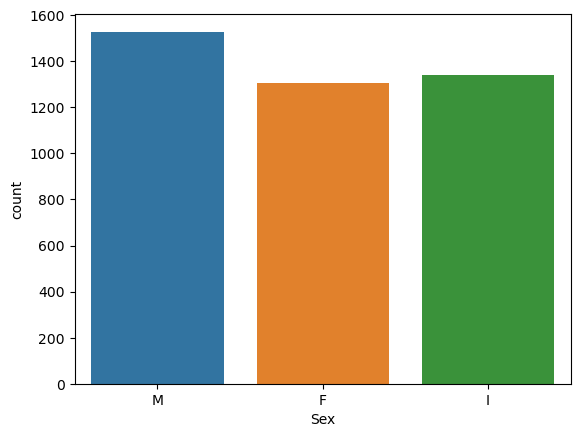

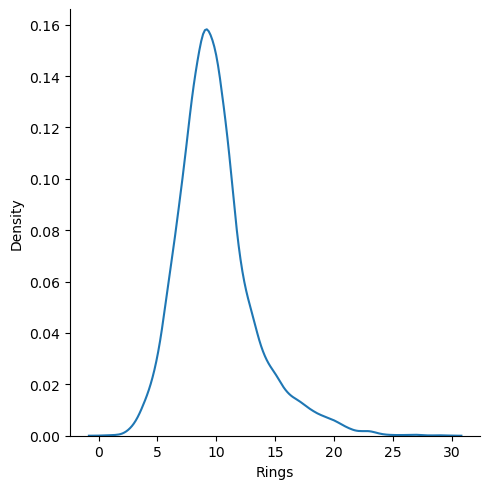

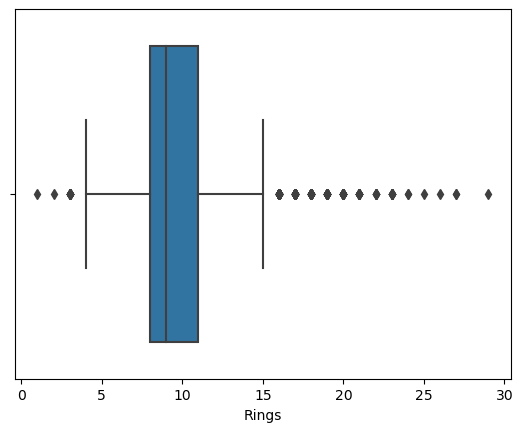

In [ ]:
# some initial EDA
sns.countplot(data=abalone, x='Sex')
plt.show()
sns.displot(data=abalone,x='Rings',kind='kde')
plt.show()
sns.boxplot(data = abalone, x = 'Rings')
plt.show()

<ipython-input-25-48b6ee6fa54e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = abalone.corr(), annot = True, vmin = -1.0, vmax = 1.0)


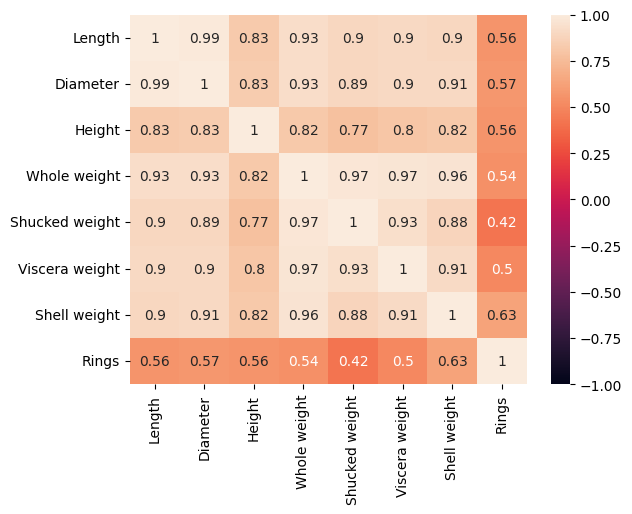

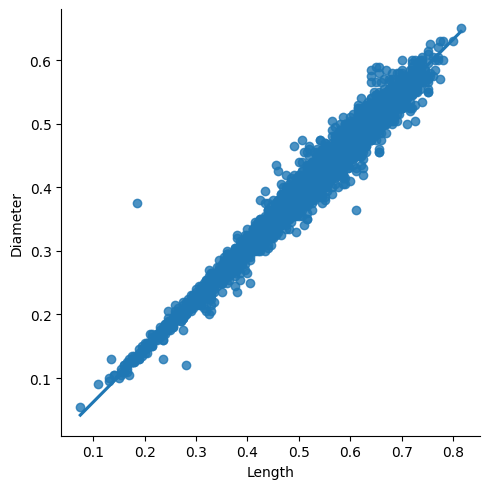

In [ ]:
# determine if there is highly correlated data
sns.heatmap(data = abalone.corr(), annot = True, vmin = -1.0, vmax = 1.0)
plt.show()
# Length and Diameter are nearly a 1.0 correlation
sns.lmplot(data=abalone, x='Length', y='Diameter')
plt.show()

In [ ]:
# perform one-hot encoding
if 'Sex' in abalone.columns:
   abalone = pd.get_dummies(data = abalone, columns = ['Sex'])
   features = abalone.copy()
   features = features.drop("Rings", axis = 1)
   target = abalone['Rings']
   target = pd.get_dummies(data = target)

#target =  np_utils.to_categorical(target)


#encoder = LabelEncoder()
#encoder.fit(target)
#encoded_target = encoder.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
#target = np_utils.to_categorical(encoded_target)

print(target)


      1   2   3   4   5   6   7   8   9   10  ...  19  20  21  22  23  24  25  \
0      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
4172   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4173   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
4174   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4175   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
4176   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      26  27  29  
0      0

In [ ]:
features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [ ]:
# set target to 'Rings'
if 'Rings' in abalone.columns:
  target = abalone.loc[:, 'Rings']

In [ ]:
features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [ ]:
abalone.Rings.unique

<bound method Series.unique of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size = 0.80,
                                                    random_state = 42)

X_train.shape

(3341, 10)

In [ ]:
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)

In [ ]:
# 1 hidden layer
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(3, activation='relu')) # hidden layer 1
#network.add(layers.Dense(3, activation='relu')) # hidden layer 2
#network.add(layers.Dense(3, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 1s 10ms/step - loss: 3.3082 - accuracy: 0.0329 - val_loss: 3.3002 - val_accuracy: 0.0526
Epoch 2/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2774 - accuracy: 0.1039 - val_loss: 3.2699 - val_accuracy: 0.1280
Epoch 3/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2465 - accuracy: 0.1233 - val_loss: 3.2392 - val_accuracy: 0.1364
Epoch 4/5
34/34 [==============================] - 0s 4ms/step - loss: 3.2148 - accuracy: 0.1266 - val_loss: 3.2071 - val_accuracy: 0.1543
Epoch 5/5
34/34 [==============================] - 0s 3ms/step - loss: 3.1785 - accuracy: 0.1589 - val_loss: 3.1673 - val_accuracy: 0.1663
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_173 (Dense)           (None, 3)                 33        
                                                                 
 dense_174 (Dense

0.16626794636249542

In [ ]:
# 2 hidden layer
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(3, activation='relu')) # hidden layer 1
network.add(layers.Dense(3, activation='relu')) # hidden layer 2
#network.add(layers.Dense(1024, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 1s 8ms/step - loss: 3.3915 - accuracy: 0.0081 - val_loss: 3.3447 - val_accuracy: 0.0179
Epoch 2/5
34/34 [==============================] - 0s 4ms/step - loss: 3.3293 - accuracy: 0.0440 - val_loss: 3.2979 - val_accuracy: 0.0921
Epoch 3/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2863 - accuracy: 0.1161 - val_loss: 3.2618 - val_accuracy: 0.1435
Epoch 4/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2514 - accuracy: 0.1541 - val_loss: 3.2305 - val_accuracy: 0.1687
Epoch 5/5
34/34 [==============================] - 0s 4ms/step - loss: 3.2203 - accuracy: 0.1646 - val_loss: 3.2014 - val_accuracy: 0.1699
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 3)                 33        
                                                                 
 dense_177 (Dense)

0.169856458902359

In [ ]:
# 3 hidden layers
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(3, activation='relu')) # hidden layer 1
network.add(layers.Dense(3, activation='relu')) # hidden layer 2
network.add(layers.Dense(3, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]
#print(y_test)

Epoch 1/5
34/34 [==============================] - 1s 9ms/step - loss: 3.3213 - accuracy: 0.1440 - val_loss: 3.3092 - val_accuracy: 0.1675
Epoch 2/5
34/34 [==============================] - 0s 4ms/step - loss: 3.2980 - accuracy: 0.1637 - val_loss: 3.2863 - val_accuracy: 0.1699
Epoch 3/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2751 - accuracy: 0.1637 - val_loss: 3.2641 - val_accuracy: 0.1699
Epoch 4/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2529 - accuracy: 0.1637 - val_loss: 3.2424 - val_accuracy: 0.1699
Epoch 5/5
34/34 [==============================] - 0s 3ms/step - loss: 3.2313 - accuracy: 0.1637 - val_loss: 3.2214 - val_accuracy: 0.1699
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 3)                 33        
                                                                 
 dense_186 (Dense)

0.169856458902359

In [ ]:
# 3 hidden layers increasing number of neurons per layer
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(256, activation='relu')) # hidden layer 1
network.add(layers.Dense(256, activation='relu')) # hidden layer 2
network.add(layers.Dense(256, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 3s 15ms/step - loss: 3.2943 - accuracy: 0.1152 - val_loss: 3.2566 - val_accuracy: 0.1507
Epoch 2/5
34/34 [==============================] - 0s 9ms/step - loss: 3.2218 - accuracy: 0.1661 - val_loss: 3.1835 - val_accuracy: 0.1866
Epoch 3/5
34/34 [==============================] - 0s 8ms/step - loss: 3.1448 - accuracy: 0.1727 - val_loss: 3.0997 - val_accuracy: 0.1902
Epoch 4/5
34/34 [==============================] - 0s 8ms/step - loss: 3.0533 - accuracy: 0.1763 - val_loss: 2.9972 - val_accuracy: 0.1866
Epoch 5/5
34/34 [==============================] - 0s 8ms/step - loss: 2.9415 - accuracy: 0.1688 - val_loss: 2.8751 - val_accuracy: 0.1830
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 3)                 33        
                                                                 
 dense_191 (Dense

0.18301434814929962

In [ ]:
# 3 hidden layers with 1024 neurons
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(1024, activation='relu')) # hidden layer 1
network.add(layers.Dense(1024, activation='relu')) # hidden layer 2
network.add(layers.Dense(1024, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 3s 68ms/step - loss: 3.3073 - accuracy: 0.1500 - val_loss: 3.2816 - val_accuracy: 0.1699
Epoch 2/5
34/34 [==============================] - 2s 70ms/step - loss: 3.2571 - accuracy: 0.1637 - val_loss: 3.2299 - val_accuracy: 0.1699
Epoch 3/5
34/34 [==============================] - 3s 87ms/step - loss: 3.2038 - accuracy: 0.1637 - val_loss: 3.1750 - val_accuracy: 0.1699
Epoch 4/5
34/34 [==============================] - 2s 53ms/step - loss: 3.1469 - accuracy: 0.1637 - val_loss: 3.1161 - val_accuracy: 0.1699
Epoch 5/5
34/34 [==============================] - 2s 53ms/step - loss: 3.0849 - accuracy: 0.1637 - val_loss: 3.0510 - val_accuracy: 0.1699
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 3)                 33        
                                                                 
 dense_196 (D

0.169856458902359

In [ ]:
# 3 hidden layers 1024 neurons per layer optimizer is adam
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(1024, activation='relu')) # hidden layer 1
network.add(layers.Dense(1024, activation='relu')) # hidden layer 2
network.add(layers.Dense(1024, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 5s 70ms/step - loss: 2.5208 - accuracy: 0.1781 - val_loss: 2.3224 - val_accuracy: 0.2261
Epoch 2/5
34/34 [==============================] - 3s 80ms/step - loss: 2.2525 - accuracy: 0.2095 - val_loss: 2.2237 - val_accuracy: 0.2321
Epoch 3/5
34/34 [==============================] - 3s 91ms/step - loss: 2.2141 - accuracy: 0.2140 - val_loss: 2.2216 - val_accuracy: 0.2225
Epoch 4/5
34/34 [==============================] - 2s 65ms/step - loss: 2.1828 - accuracy: 0.2236 - val_loss: 2.1758 - val_accuracy: 0.2404
Epoch 5/5
34/34 [==============================] - 2s 61ms/step - loss: 2.1697 - accuracy: 0.2305 - val_loss: 2.1527 - val_accuracy: 0.2440
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 3)                 33        
                                                                 
 dense_201 (D

0.24401913583278656

In [ ]:
# 3 hidden layers 1024 neurons per layer
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(2048, activation='relu')) # hidden layer 1
network.add(layers.Dense(2048, activation='relu')) # hidden layer 2
network.add(layers.Dense(2048, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 12s 317ms/step - loss: 2.5471 - accuracy: 0.1892 - val_loss: 2.2756 - val_accuracy: 0.2249
Epoch 2/5
34/34 [==============================] - 10s 287ms/step - loss: 2.2616 - accuracy: 0.2248 - val_loss: 2.2200 - val_accuracy: 0.2297
Epoch 3/5
34/34 [==============================] - 10s 300ms/step - loss: 2.2312 - accuracy: 0.2224 - val_loss: 2.2048 - val_accuracy: 0.2321
Epoch 4/5
34/34 [==============================] - 11s 336ms/step - loss: 2.2081 - accuracy: 0.2311 - val_loss: 2.1698 - val_accuracy: 0.2416
Epoch 5/5
34/34 [==============================] - 11s 331ms/step - loss: 2.1974 - accuracy: 0.2248 - val_loss: 2.1727 - val_accuracy: 0.2404
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 3)                 33        
                                                                 
 de

0.24043062329292297

In [ ]:
# 3 hidden layers with 1024 neurons
# create model
network = models.Sequential()

# add layers
network.add(layers.Dense(3, input_shape = (10, ),activation ='relu'))
network.add(layers.Dense(1024, activation='relu')) # hidden layer 1
network.add(layers.Dense(1024, activation='relu')) # hidden layer 2
network.add(layers.Dense(1024, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'adagrad',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 4s 89ms/step - loss: 3.3260 - accuracy: 0.1320 - val_loss: 3.3201 - val_accuracy: 0.1364
Epoch 2/5
34/34 [==============================] - 3s 97ms/step - loss: 3.3138 - accuracy: 0.1574 - val_loss: 3.3087 - val_accuracy: 0.1663
Epoch 3/5
34/34 [==============================] - 3s 89ms/step - loss: 3.3025 - accuracy: 0.1778 - val_loss: 3.2979 - val_accuracy: 0.1758
Epoch 4/5
34/34 [==============================] - 2s 68ms/step - loss: 3.2917 - accuracy: 0.1793 - val_loss: 3.2874 - val_accuracy: 0.1746
Epoch 5/5
34/34 [==============================] - 2s 67ms/step - loss: 3.2811 - accuracy: 0.1787 - val_loss: 3.2771 - val_accuracy: 0.1734
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 3)                 33        
                                                                 
 dense_211 (D

0.1734449714422226

In [ ]:
# Run PCA prior to re-running best performing neural net
pca = PCA(n_components=0.99, whiten = True)

# Fit transorm to maintain 99% of variance
features_pca = pca.fit_transform(features)

# run features_pca.head to identify what features were selected
features_pca

array([[ 0.03636513, -1.22012567, -1.27548171],
       [-0.31594351, -1.26687963, -1.91663931],
       [ 0.17597621,  1.22592615, -1.22015922],
       ...,
       [ 0.82398467, -1.11645045,  0.16369833],
       [ 0.69743298,  1.29339808, -0.26136237],
       [ 1.71722187, -1.00092699,  1.80884367]])

In [ ]:
# run train_test_split using features_pca
# split the data
X_train, X_test, y_train, y_test = train_test_split(features_pca, target,
                                                    train_size = 0.80,
                                                    random_state = 42)

# run shape to understand how many features should be input into neural network
# down to 3 features !!
X_train.shape

(3341, 3)

In [ ]:
y_train.shape

(3341, 28)

In [ ]:
# 3 hidden layers with 1024 neurons
# create model
network = models.Sequential()

# add layers after PCA modify input_shape
network.add(layers.Dense(3, input_shape = (3, ),activation ='relu'))
network.add(layers.Dense(1024, activation='relu')) # hidden layer 1
network.add(layers.Dense(1024, activation='relu')) # hidden layer 2
network.add(layers.Dense(1024, activation='relu')) # hidden layer 3
network.add(layers.Dense(28, activation='softmax'))



# compile the model
network.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
                )

# train neural network
history = network.fit(X_train,
                      y_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (X_test, y_test))

# summarize
network.summary()

# predict and evaluate mean_squared_error
network.evaluate(X_test, y_test)[1]

Epoch 1/5
34/34 [==============================] - 5s 73ms/step - loss: 2.5855 - accuracy: 0.1658 - val_loss: 2.3181 - val_accuracy: 0.2165
Epoch 2/5
34/34 [==============================] - 2s 72ms/step - loss: 2.2603 - accuracy: 0.2155 - val_loss: 2.2038 - val_accuracy: 0.2321
Epoch 3/5
34/34 [==============================] - 3s 83ms/step - loss: 2.1990 - accuracy: 0.2320 - val_loss: 2.1784 - val_accuracy: 0.2368
Epoch 4/5
34/34 [==============================] - 4s 132ms/step - loss: 2.1836 - accuracy: 0.2302 - val_loss: 2.1387 - val_accuracy: 0.2751
Epoch 5/5
34/34 [==============================] - 3s 100ms/step - loss: 2.1515 - accuracy: 0.2347 - val_loss: 2.1354 - val_accuracy: 0.2644
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 3)                 12        
                                                                 
 dense_159 

0.26435407996177673